In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [39]:
train_data = pd.read_excel('/home/greciya/int_3/train.xlsx')
train_data['dt'] = pd.to_datetime(train_data['dt'])
train_data = train_data.sort_values(by='dt')

train_data

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [40]:
train_data.isnull().sum()
train_data['Цена на арматуру'].describe()

count      400.000000
mean     39229.475000
std      13407.979668
min      21000.000000
25%      31075.000000
50%      35450.000000
75%      42000.000000
max      79000.000000
Name: Цена на арматуру, dtype: float64

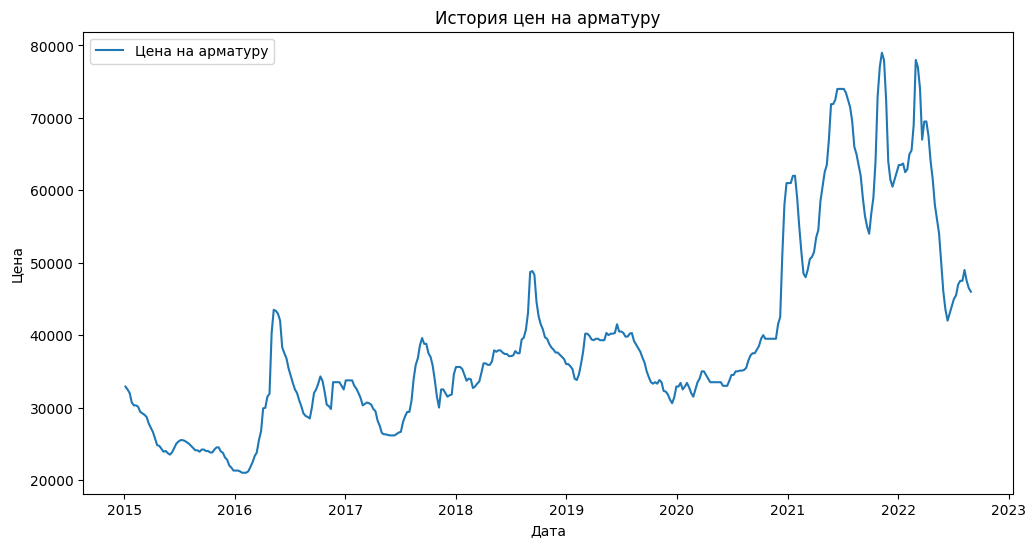

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['dt'], train_data['Цена на арматуру'], label='Цена на арматуру')
plt.title('История цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

In [42]:
for i in range(1, 7):  # Лаги за 1-6 недель
    train_data[f'lag_{i}'] = train_data['Цена на арматуру'].shift(i)

train_data['rolling_mean_4'] = train_data['Цена на арматуру'].rolling(window=4).mean()

train_data['month'] = train_data['dt'].dt.month
train_data['week_of_year'] = train_data['dt'].dt.isocalendar().week

train_data['price_diff'] = train_data['Цена на арматуру'].diff()

train_data = train_data.dropna()

In [43]:
X = train_data.drop(columns=['Цена на арматуру', 'dt'])
y = train_data['Цена на арматуру']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)